## Origin Dataset

Mean Flow Size: 162.57574559928497
Variance of Flow Size: 9530067.630701538
Total Flows:  1103173
Total Packets:  179349173


/tmp/ipykernel_32836/2304014406.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_32836/2304014406.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


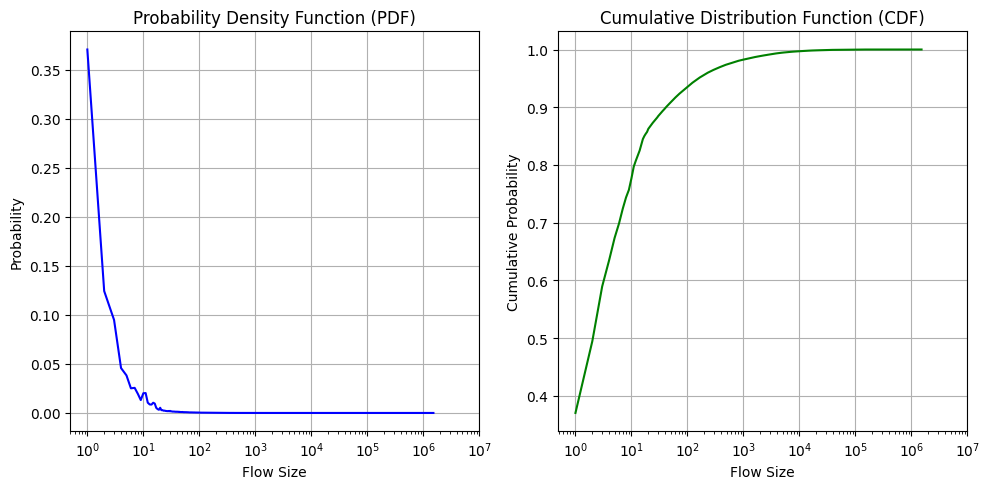

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_flow_size_distribution(fileName):
    flow_size = []
    frequency = []
    total_packets = 0
    
    with open(fileName, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size.append(int(items[0]))
            frequency.append(int(items[1]))
            total_packets += int(items[0])*int(items[1])
            
            
    # Calculate mean and variance
    flow_sizes_array = np.array(flow_size)
    frequencies_array = np.array(frequency)

    mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
    variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
    print("Mean Flow Size:", mean_flow_size)
    print("Variance of Flow Size:", variance_flow_size)
    
    # Plot PDF & CDF
    total_flows = sum(frequency)
    probabilities = [freq / total_flows for freq in frequency]
    # print(flow_size)
    print("Total Flows: ", total_flows)
    print("Total Packets: ", total_packets)
    # print(probabilities)
    
    cdf = np.cumsum(probabilities)
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(flow_size, probabilities, linestyle='-', color='blue')
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(flow_size, cdf, linestyle='-', color='green')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

## Fake Dataset

Mean Flow Size: 1.937092
Variance of Flow Size: 933.7593385835361
Total Flows:  1000000
Total Packets:  1937092


/tmp/ipykernel_32836/1579388312.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_32836/1579388312.py:60: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


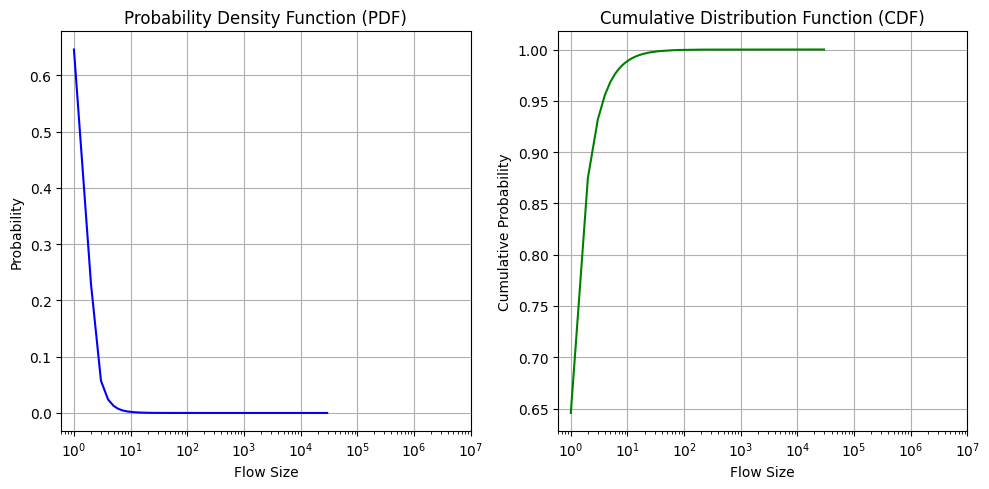

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_flow_size_distribution(fileName):
    flow_size = []
    frequency = []
    total_packets = 0
    
    with open(fileName, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size.append(int(items[0]))
            frequency.append(int(items[1]))
            total_packets += int(items[0])*int(items[1])
            
            
    # Calculate mean and variance
    flow_sizes_array = np.array(flow_size)
    frequencies_array = np.array(frequency)

    mean_flow_size = np.average(flow_sizes_array, weights=frequencies_array)
    variance_flow_size = np.average((flow_sizes_array - mean_flow_size)**2, weights=frequencies_array)
    
    print("Mean Flow Size:", mean_flow_size)
    print("Variance of Flow Size:", variance_flow_size)
    
    # Plot PDF & CDF
    total_flows = sum(frequency)
    probabilities = [freq / total_flows for freq in frequency]
    # print(flow_size)
    print("Total Flows: ", total_flows)
    print("Total Packets: ", total_packets)
    # print(probabilities)
    
    cdf = np.cumsum(probabilities)
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(flow_size, probabilities, linestyle='-', color='blue')
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(flow_size, cdf, linestyle='-', color='green')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fake_dist.txt")

## Verify dataset

[Target] Mean Flow Size: 1.937092
[Target] Variance of Flow Size: 933.7593385835361
[Generated] Mean Flow Size: 10.159211
[Generated] Variance of Flow Size: 445135.5928808575
[Target] Total Flows:  1000000
[Target] Total Packets:  1937092
[Generated] Total Flows:  1000000
[Generated] Total Packets:  10159211


/tmp/ipykernel_32836/3945934093.py:82: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,10000])
/tmp/ipykernel_32836/3945934093.py:95: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


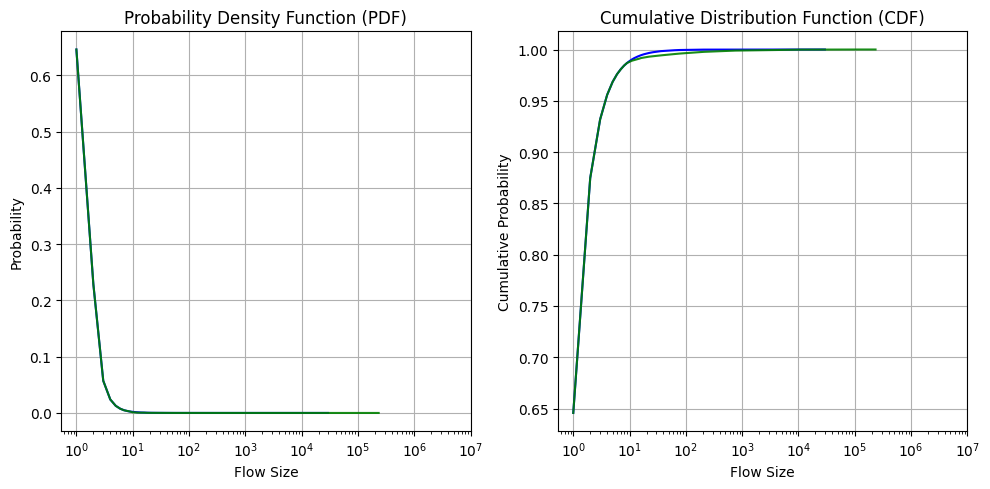

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def draw_flow_size_distribution(fileName1, fileName2):
    flow_size1 = []
    frequency1 = []
    total_packets1 = 0
    
    with open(fileName1, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size1.append(int(items[0]))
            frequency1.append(int(items[1]))
            total_packets1 += int(items[0])*int(items[1])
            
            
    # Calculate mean and variance
    flow_sizes_array1 = np.array(flow_size1)
    frequencies_array1 = np.array(frequency1)

    mean_flow_size1 = np.average(flow_sizes_array1, weights=frequencies_array1)
    variance_flow_size1 = np.average((flow_sizes_array1 - mean_flow_size1)**2, weights=frequencies_array1)
    
    # Plot PDF & CDF
    total_flows1 = sum(frequency1)
    probabilities1 = [freq / total_flows1 for freq in frequency1]
    
    cdf1 = np.cumsum(probabilities1)
    
    #############
    
    flow_size2 = []
    frequency2 = []
    total_packets2 = 0
    
    with open(fileName2, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size2.append(int(items[0]))
            frequency2.append(int(items[1]))
            total_packets2 += int(items[0])*int(items[1])
            
            
    # Calculate mean and variance
    flow_sizes_array2 = np.array(flow_size2)
    frequencies_array2 = np.array(frequency2)

    mean_flow_size2 = np.average(flow_sizes_array2, weights=frequencies_array2)
    variance_flow_size2 = np.average((flow_sizes_array2 - mean_flow_size2)**2, weights=frequencies_array2)
    
    # Plot PDF & CDF
    total_flows2 = sum(frequency2)
    probabilities2 = [freq / total_flows2 for freq in frequency2]
    
    cdf2 = np.cumsum(probabilities2)
    
    
    print("[Target] Mean Flow Size:", mean_flow_size1)
    print("[Target] Variance of Flow Size:", variance_flow_size1)
    print("[Generated] Mean Flow Size:", mean_flow_size2)
    print("[Generated] Variance of Flow Size:", variance_flow_size2)
    
    print("[Target] Total Flows: ", total_flows1)
    print("[Target] Total Packets: ", total_packets1)
    print("[Generated] Total Flows: ", total_flows2)
    print("[Generated] Total Packets: ", total_packets2)
    
    ############
    
    plt.figure(figsize=(10, 5))
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(flow_size1, probabilities1, linestyle='-', color='blue')
    plt.plot(flow_size2, probabilities2, linestyle='-', color='green', alpha=0.9)
    
    # plt.bar(flow_size, probabilities, width=1.0, color='blue', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)
    
    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(flow_size1, cdf1, linestyle='-', color='blue')
    plt.plot(flow_size2, cdf2, linestyle='-', color='green', alpha=0.9)
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fake_dist.txt", 
                            "/home/ming/SketchMercator/traffic_sampler/fs_dist/verified_sorted.txt")

---

## TEST

Total Flows:  1103173
Total Packets:  179349173


/tmp/ipykernel_9541/2320782823.py:93: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 10000])
/tmp/ipykernel_9541/2320782823.py:107: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 100000])


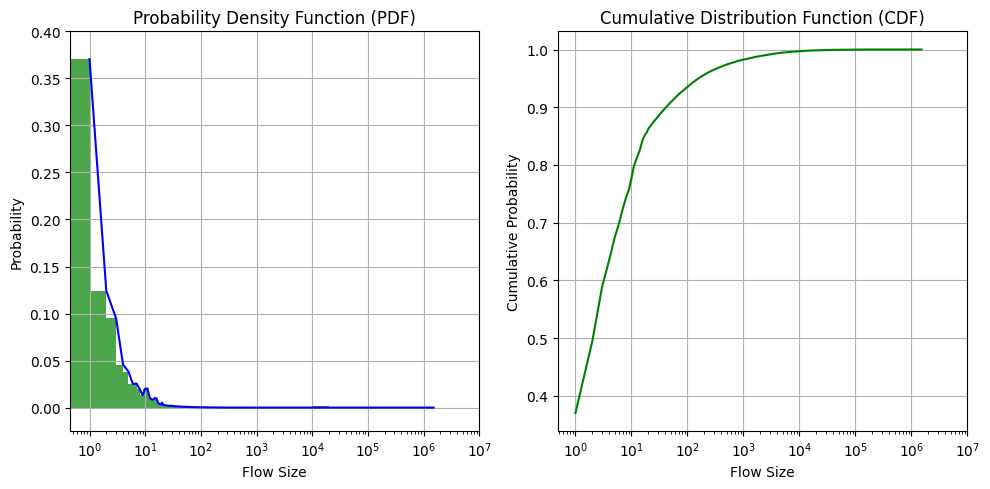

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import math

def find_next_power_of_10(number):
    # Find the exponent by taking the logarithm base 10
    exponent = math.ceil(math.log10(number))
    # Calculate the next power of 10 using exponentiation
    result = 10 ** exponent
    
    return result

def accumulate_into_ranges(flow_sizes, frequencies, ranges):
    # Initialize a dictionary to store the accumulated frequencies for each range
    accumulated_frequencies = {r: 0 for r in ranges}

    # Iterate through flow sizes and frequencies
    for flow_size, freq in zip(flow_sizes, frequencies):
        if flow_size == 1:
            accumulated_frequencies[1] += freq
        # Find the range to which the flow size belongs
        for i in range(len(ranges)-1):
            if ranges[i] < flow_size <= ranges[i+1]:
                # Add the frequency to the accumulated frequencies for the corresponding range
                accumulated_frequencies[ranges[i+1]] += freq
                break
    
    return accumulated_frequencies

def draw_flow_size_distribution(fileName):
    flow_size = []
    frequency = []
    total_packets = 0
    
    with open(fileName, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size.append(int(items[0]))
            frequency.append(int(items[1]))
            total_packets += int(items[0]) * int(items[1])
            
    
    # Plot PDF & CDF
    total_flows = sum(frequency)
    probabilities = [freq / total_flows for freq in frequency]
    # print(probabilities)
    cdf = np.cumsum(probabilities)
    
    
    # Quantization bins
    bins = []
    for i in range(1, 1001): # 1 - 1000
        bins.append(i)
    for i in range(11, 101): # 1000 - 10000 
        bins.append(i*100)
    rec = math.ceil(math.log10(find_next_power_of_10(flow_size[-1])))
    while(rec > 4):    
        for i in range(2, 11): # 10000 - 100000 
            bins.append(i*(10 ** (rec-1)))
        
        rec -= 1
    bins.sort()
    # print(bins)
    
    # Quantize flow sizes into bins
    quantized_dist = accumulate_into_ranges(flow_size, probabilities, bins)
    quantized_flow_sizes = list(quantized_dist.values())
    # print(quantized_dist)
    # print(accumulate_into_ranges(flow_size, frequency, bins))
    
    bins.insert(0,0)
    left_edges = bins[:-1]
    # print(left_edges)
    heights = quantized_flow_sizes
    widths = [right - left for left, right in zip(bins[:-1], bins[1:])]
    # print(widths)
    
    print("Total Flows: ", total_flows)
    print("Total Packets: ", total_packets)
    
    # Plot
    plt.figure(figsize=(10, 5))
    
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(flow_size, probabilities, linestyle='-', color='blue', label='PDF')
    plt.bar(left_edges, heights, width=widths, align='edge', color='green', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10, 10000])
    plt.ylim([-0.025, 0.4])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)

    
    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(flow_size, cdf, linestyle='-', color='green', label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10, 100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Example usage
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fs_dist.txt")

Total Flows:  1000000
Total Packets:  1937092


/tmp/ipykernel_9541/3254837435.py:93: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 10000])
/tmp/ipykernel_9541/3254837435.py:106: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 100000])


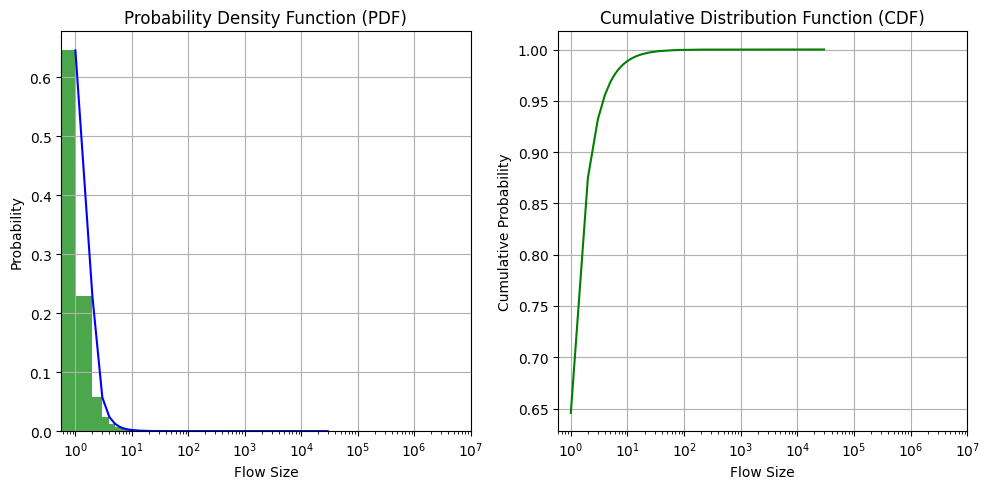

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math

def find_next_power_of_10(number):
    # Find the exponent by taking the logarithm base 10
    exponent = math.ceil(math.log10(number))
    # Calculate the next power of 10 using exponentiation
    result = 10 ** exponent
    
    return result

def accumulate_into_ranges(flow_sizes, frequencies, ranges):
    # Initialize a dictionary to store the accumulated frequencies for each range
    accumulated_frequencies = {r: 0 for r in ranges}

    # Iterate through flow sizes and frequencies
    for flow_size, freq in zip(flow_sizes, frequencies):
        if flow_size == 1:
            accumulated_frequencies[1] += freq
        # Find the range to which the flow size belongs
        for i in range(len(ranges)-1):
            if ranges[i] < flow_size <= ranges[i+1]:
                # Add the frequency to the accumulated frequencies for the corresponding range
                accumulated_frequencies[ranges[i+1]] += freq
                break
    
    return accumulated_frequencies

def draw_flow_size_distribution(fileName):
    flow_size = []
    frequency = []
    total_packets = 0
    
    with open(fileName, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            flow_size.append(int(items[0]))
            frequency.append(int(items[1]))
            total_packets += int(items[0]) * int(items[1])
            
    
    # Plot PDF & CDF
    total_flows = sum(frequency)
    probabilities = [freq / total_flows for freq in frequency]
    # print(probabilities)
    cdf = np.cumsum(probabilities)
    
    
    # Quantization bins
    bins = []
    for i in range(1, 1001): # 1 - 1000
        bins.append(i)
    for i in range(11, 101): # 1000 - 10000 
        bins.append(i*100)
    rec = math.ceil(math.log10(find_next_power_of_10(flow_size[-1])))
    while(rec > 4):    
        for i in range(2, 11): # 10000 - 100000 
            bins.append(i*(10 ** (rec-1)))
        
        rec -= 1
    bins.sort()
    # print(bins)
    
    # Quantize flow sizes into bins
    quantized_dist = accumulate_into_ranges(flow_size, probabilities, bins)
    quantized_flow_sizes = list(quantized_dist.values())
    # print(quantized_dist)
    # print(accumulate_into_ranges(flow_size, frequency, bins))
    
    bins.insert(0,0)
    left_edges = bins[:-1]
    # print(left_edges)
    heights = quantized_flow_sizes
    widths = [right - left for left, right in zip(bins[:-1], bins[1:])]
    # print(widths)
    
    print("Total Flows: ", total_flows)
    print("Total Packets: ", total_packets)
    
    # Plot
    plt.figure(figsize=(10, 5))
    
    # Plot PDF
    plt.subplot(1, 2, 1)
    plt.plot(flow_size, probabilities, linestyle='-', color='blue', label='PDF')
    plt.bar(left_edges, heights, width=widths, align='edge', color='green', alpha=0.7)
    plt.title('Probability Density Function (PDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10, 10000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)

    
    # Plot CDF
    plt.subplot(1, 2, 2)
    plt.plot(flow_size, cdf, linestyle='-', color='green', label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10, 100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])  # Set specific tick positions
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Example usage
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/fake_dist.txt")

Total Flows:  1000000
Total Packets:  10662469


/tmp/ipykernel_9541/3254837435.py:93: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 10000])
/tmp/ipykernel_9541/3254837435.py:106: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10, 100000])


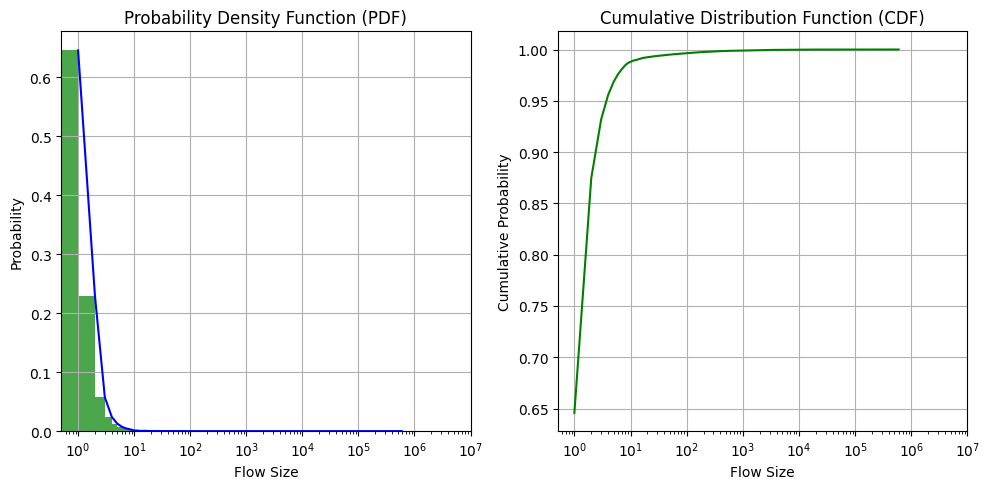

In [28]:
draw_flow_size_distribution("/home/ming/SketchMercator/traffic_sampler/fs_dist/verified_sorted.txt")